I will first collect Google stock price data using the Yahoo Finance API:

In [36]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [37]:
end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days=365)).strftime('%Y-%m-%d')

data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
display(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,119.429497,123.278000,118.769249,123.250000,123.250000,34522000
1,2022-04-26,122.750000,122.750000,119.161850,119.505997,119.505997,49394000
2,2022-04-27,114.373001,117.500000,113.124252,115.020500,115.020500,62238000
3,2022-04-28,117.114998,120.438499,115.143898,119.411499,119.411499,36790000
4,2022-04-29,117.578003,118.959999,114.694000,114.966499,114.966499,33694000


I only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [39]:
data = data[['Date', 'Close']]
display(data.head())

,Date,Close
0,2022-04-25,123.250000
1,2022-04-26,119.505997
2,2022-04-27,115.020500
3,2022-04-28,119.411499
4,2022-04-29,114.966499


Now let’s visualize the close prices of Google before moving forward:

In [40]:
import matplotlib.pyplot as plt

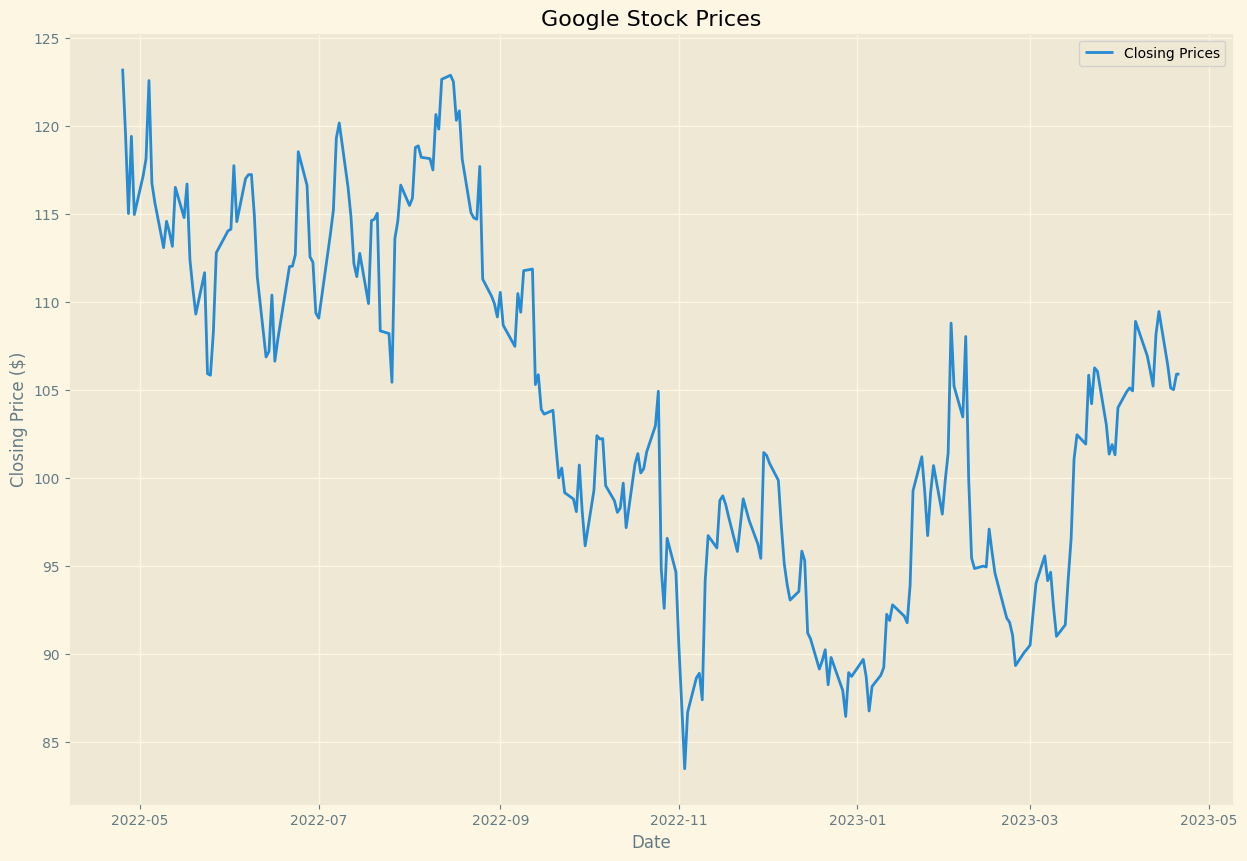

In [41]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15, 10))
plt.plot(data['Date'], data['Close'], label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Google Stock Prices')
plt.legend()
plt.show()


Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the **seasonal decomposition** method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

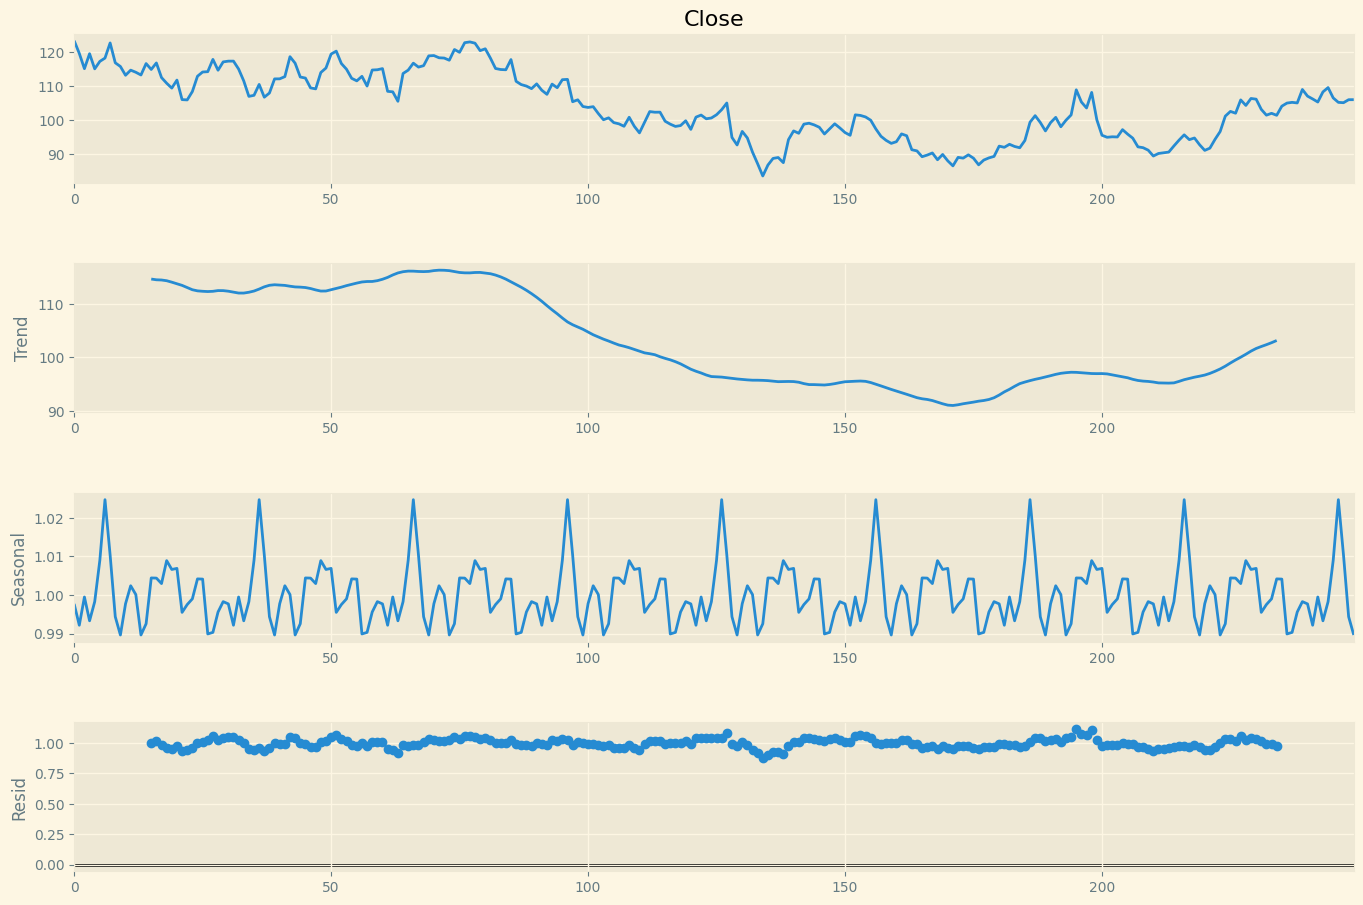

In [54]:
result = seasonal_decompose(data['Close'], 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

To determine if the time series is stationary or seasonal, we can examine the residual component of the decomposition. If the residual component appears to be random noise with a constant mean and variance, then the time series can be considered stationary. On the other hand, if the residual component exhibits a repeating pattern over time, then the time series may have a seasonal component.

So my data is not stationary it is seasonal, I need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data, but before using the SARIMA model, I will use the ARIMA model.

To use ARIMA or SARIMA, I need to find the p, d, and q values. I can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot, the value of d is either 0 or 1. If the data is stationary, I should use 0, and if the data is seasonal, I should use 1. As my data is seasonal, I should use 1 as the d value.

Now here’s how to find the value of p:

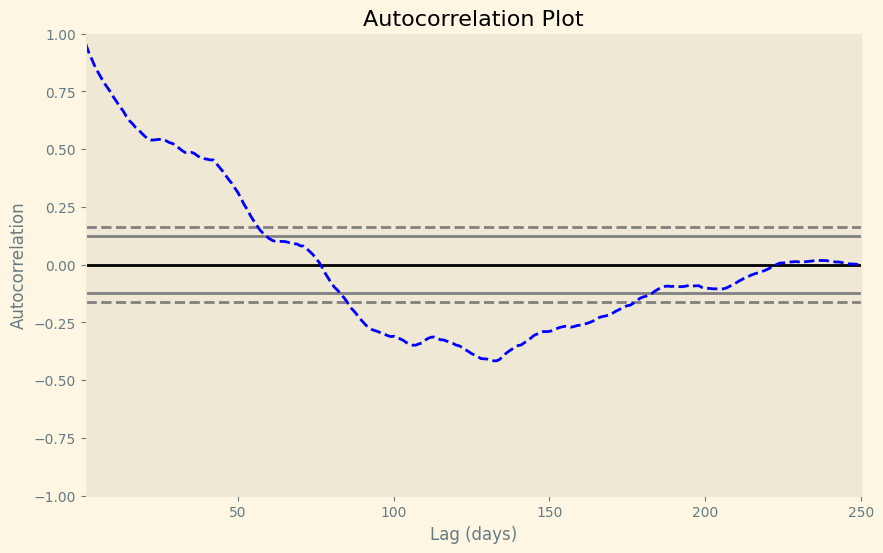

In [50]:
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(data['Close'], color='blue', linestyle='--')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()